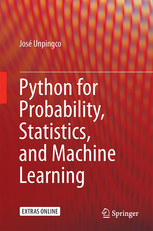

In [5]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [6]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We considered Maximum Likelihood Estimation (MLE) and Maximum A-Posteriori
(MAP) estimation and in each case we started out with a probability density
function of some kind and we further assumed that the samples were identically
distributed and independent (iid). The idea behind robust statistics
[[maronna2006robust]](#maronna2006robust) is to construct estimators that can survive the
weakening of either or both of these assumptions. More concretely, suppose you
have a model that works great except for a few outliers. The temptation is to
just ignore the outliers and proceed. Robust estimation methods provide a
disciplined way to handle outliers without cherry-picking data that works for
your favored model.

### The Notion of Location

The first notion we need is *location*, which is  a generalization of the idea
of *central value*. Typically, we just use an estimate of the mean for this,
but we will see later why this could be a bad idea.  The general idea of
location satisfies the following requirements Let $X$ be a random variable with
distribution $F$, and let $\theta(X)$ be some descriptive measure of $F$. Then
$\theta(X)$ is said to be a measure of *location* if for any constants *a* and
*b*, we have the following:

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\theta(X+b)  = \theta(X) +b 
\label{_auto1} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} \
\theta(-X)   = -\theta(X)  
\label{_auto2} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation} \
X \ge 0 \Rightarrow \theta(X)  \ge 0  
\label{_auto3} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation} \
\theta(a X) = a\theta(X)
\label{_auto4} \tag{4}
\end{equation}
$$

 The first condition is called *location equivariance* (or *shift-invariance* in
signal processing lingo). The fourth condition is called *scale equivariance*,
which means that the units that $X$ is measured in should not effect the value
of the  location estimator.  These requirements capture the intuition of
*centrality* of a distribution, or where most of the
probability mass is located.

For example, the sample mean estimator is $ \hat{\mu}=\frac{1}{n}\sum X_i $. The first
requirement is obviously satisfied as $ \hat{\mu}=\frac{1}{n}\sum (X_i+b) = b +
\frac{1}{n}\sum X_i =b+\hat{\mu}$. Let us consider the second requirement:$
\hat{\mu}=\frac{1}{n}\sum -X_i = -\hat{\mu}$. Finally, the last requirement is
satisfied with $ \hat{\mu}=\frac{1}{n}\sum a X_i =a \hat{\mu}$.

### Robust Estimation and Contamination

Now that we have the generalized location of centrality embodied in the
*location* parameter, what can we do with it?  Previously, we assumed that our samples
were all identically distributed. The key idea is that the samples might be
actually coming from a *single* distribution that is contaminated by another nearby
distribution, as in the following:

$$
F(X) = \epsilon G(X) + (1-\epsilon)H(X)
$$

 where $ \epsilon $ randomly toggles between zero and one. This means
that our data samples $\lbrace X_i \rbrace$ actually derived from two separate
distributions, $ G(X) $ and $ H(X) $. We just don't know how they are mixed
together. What we really want  is an estimator  that captures the location of $
G(X) $ in the face of random intermittent contamination by $ H(X)$.  For
example, it may be that this contamination is responsible for the outliers in a
model that otherwise works well with the dominant $F$ distribution. It can get
even worse than that because we don't know that there is only one contaminating
$H(X)$ distribution out there. There may be a whole family of distributions
that are contaminating $G(X)$. This means that whatever estimators we construct
have to be derived from a more generalized family of distributions instead of
from a single distribution,  as the maximum-likelihood method assumes.  This is
what makes robust estimation so difficult --- it has to deal with *spaces* of
function distributions instead of parameters from a particular probability
distribution.

### Generalized Maximum Likelihood Estimators

M-estimators are generalized maximum likelihood estimators. Recall that for
maximum likelihood, we want to maximize the likelihood function as in the
following:

$$
L_{\mu}(x_i) = \prod f_0(x_i-\mu)
$$

 and then to find the estimator $\hat{\mu}$ so that

$$
\hat{\mu} = \arg \max_{\mu} L_{\mu}(x_i)
$$

  So far, everything is the same as our usual maximum-likelihood
derivation except for the fact that we don't assume a specific $f_0$ as the
distribution of the $\lbrace X_i\rbrace$. Making the definition of

$$
\rho = -\log f_0
$$

 we obtain the more convenient form of the likelihood product and the
optimal $\hat{\mu}$ as

$$
\hat{\mu} = \arg \min_{\mu} \sum \rho(x_i-\mu)
$$

 If $\rho$ is differentiable, then differentiating  this with respect
to $\mu$ gives

<!-- Equation labels as ordinary links -->
<div id="eq:muhat"></div>

$$
\begin{equation}
\sum \psi(x_i-\hat{\mu}) = 0 
\label{eq:muhat} \tag{5}
\end{equation}
$$

 with $\psi = \rho^\prime$, the first derivative of $\rho$ , and for technical reasons we will assume that
$\psi$ is increasing. So far, it looks like we just pushed some definitions
around, but the key idea is we want to consider general $\rho$ functions that
may not be maximum likelihood estimators for *any* distribution. Thus, our
focus is now on uncovering the nature of $\hat{\mu}$.

### Distribution of M-estimates

For a given distribution $F$, we define $\mu_0=\mu(F)$ as the solution to the
following

$$
\mathbb{E}_F(\psi(x-\mu_0))= 0
$$

 It is technical to show, but it turns out that $\hat{\mu} \sim
\mathcal{N}(\mu_0,\frac{v}{n})$ with

$$
v = \frac{\mathbb{E}_F(\psi(x-\mu_0)^2)}{(\mathbb{E}_F(\psi^\prime(x-\mu_0)))^2}
$$

 Thus, we can say that $\hat{\mu}$ is asymptotically normal with asymptotic
value $\mu_0$ and asymptotic variance $v$. This leads to the efficiency ratio
which is defined as  the following:

$$
\texttt{Eff}(\hat{\mu})= \frac{v_0}{v}
$$

 where $v_0$ is the asymptotic variance of the MLE and measures how
near $\hat{\mu}$ is to the optimum. In other words, this provides a sense of
how much outlier contamination costs in terms of samples. For example, if for
two estimates with asymptotic variances $v_1$ and $v_2$, we have $v_1=3v_2$,
then first estimate requires three times as many observations to obtain the
same variance as the second. Furthermore, for the sample mean (i.e.,
$\hat{\mu}=\frac{1}{n} \sum X_i$) with $F=\mathcal{N}$, we have $\rho=x^2/2$
and $\psi=x$ and also $\psi'=1$. Thus, we have $v=\mathbb{V}(x)$.
Alternatively, using the sample median as the estimator for the location, we
have $v=1/(4 f(\mu_0)^2)$.  Thus, if we have $F=\mathcal{N}(0,1)$, for the
sample median, we obtain $v={2\pi}/{4} \approx 1.571$. This means that the
sample median takes approximately 1.6 times as many samples to obtain the same
variance for the location as the sample mean. The sample median is 
far more immune to the effects of outliers than the sample mean, so this 
gives a sense of how much this robustness costs in samples.

** M-Estimates as Weighted Means.** One way to think about M-estimates is a
weighted means. Operationally, this
means that we want weight functions that can circumscribe the
influence of the individual data points, but, when taken as a whole,
still provide good estimated parameters. Most of the time, we have $\psi(0)=0$ and $\psi'(0)$ exists so
that $\psi$ is approximately linear at the origin. Using the following
definition:

$$
W(x)  =  \begin{cases}
                \psi(x)/x & \text{if} \: x \neq 0 \\\
                \psi'(x)  & \text{if} \: x =0 
            \end{cases}
$$

 We can write our Equation ref{eq:muhat} as follows:

<!-- Equation labels as ordinary links -->
<div id="eq:Wmuhat"></div>

$$
\begin{equation}
\sum W(x_i-\hat{\mu})(x_i-\hat{\mu}) = 0 
\label{eq:Wmuhat} \tag{6}
\end{equation}
$$

 Solving this for $\hat{\mu} $ yields the following,

$$
\hat{\mu} = \frac{\sum w_{i} x_i}{\sum w_{i}}
$$

 where $w_{i}=W(x_i-\hat{\mu})$. This is not practically useful
because the $w_i$ contains $\hat{\mu}$, which is what we are trying to solve
for. The question that remains is how to pick the $\psi$ functions. This is
still an open question, but the Huber functions are a well-studied choice.

### Huber Functions

The family of Huber functions is defined by the following:

$$
\rho_k(x ) = \begin{cases}
                x^2         & \mbox{if }  |x|\leq k \\\
                2 k |x|-k^2 & \mbox{if }  |x| >  k
                \end{cases}
$$

 with corresponding derivatives $2\psi_k(x)$ with

$$
\psi_k(x ) = \begin{cases}
                x              & \mbox{if } \: |x| \leq k \\\
                \text{sgn}(x)k & \mbox{if } \: |x| >  k
                \end{cases}
$$

 where the limiting cases $k \rightarrow \infty$ and $k \rightarrow 0$
correspond to the mean and median, respectively. To see this, take
$\psi_{\infty} = x$ and therefore $W(x) = 1$ and thus the defining Equation
ref{eq:Wmuhat} results in

$$
\sum_{i=1}^{n} (x_i-\hat{\mu}) = 0
$$

 and then solving this leads to $\hat{\mu} = \frac{1}{n}\sum x_i$.
Note that choosing $k=0$ leads to  the sample median, but that is not so
straightforward to solve for. Nonetheless, Huber functions provide a way
to move between two extremes of estimators for location (namely, 
the mean vs. the median) with a tunable parameter $k$. 
The $W$ function corresponding to Huber's $\psi$ is the following:

$$
W_k(x) = \min\Big{\lbrace} 1, \frac{k}{|x|} \Big{\rbrace}
$$

 [Figure](#fig:Robust_Statistics_0001) shows the Huber weight
function for $k=2$ with some sample points. The idea is that the computed
location, $\hat{\mu}$ is computed from Equation ref{eq:Wmuhat} to lie somewhere
in the middle of the weight function so that those terms (i.e., *insiders*)
have their values fully reflected in the location estimate. The black circles
are the *outliers* that have their values attenuated by the weight function so
that only a fraction of their presence is represented in the location estimate.

<!-- dom:FIGURE: [fig-statistics/Robust_Statistics_0001.png, width=500 frac=0.80] This shows the Huber weight function, $W_2(x)$ and some cartoon data points that are insiders or outsiders as far as the robust location estimate is concerned.  <div id="fig:Robust_Statistics_0001"></div> -->
<!-- begin figure -->
<div id="fig:Robust_Statistics_0001"></div>

<p>This shows the Huber weight function, $W_2(x)$ and some cartoon data points that are insiders or outsiders as far as the robust location estimate is concerned.</p>
<img src="fig-statistics/Robust_Statistics_0001.png" width=500>

<!-- end figure -->


### Breakdown Point

So far, our discussion of robustness has been very abstract.  A more concrete
concept of robustness comes from the breakdown point.  In the simplest terms,
the breakdown point describes what happens when a single data point in an
estimator is changed in the most damaging way possible. For example, suppose we
have the sample mean, $\hat{\mu}=\sum x_i/n$, and we take one of the $x_i$
points to be infinite. What happens to this estimator? It also goes infinite.
This means that the breakdown point of the estimator is 0%. On the other hand,
the median has a breakdown point of 50%, meaning that half of the data for
computing the median could go infinite without affecting the median value. The median
is a *rank* statistic that cares more about the relative ranking of the data
than the values of the data, which explains its robustness.

The simpliest but still formal way to express the breakdown point is to
take $n$ data points, $\mathcal{D} = \lbrace (x_i,y_i) \rbrace$. Suppose $T$
is a regression estimator that yields a vector of regression coefficients,
$\boldsymbol{\theta}$,

$$
T(\mathcal{D}) = \boldsymbol{\theta}
$$

 Likewise, consider all possible corrupted samples of the data
$\mathcal{D}^\prime$. The maximum *bias* caused by this contamination is
the following:

$$
\texttt{bias}_{m} = \sup_{\mathcal{D}^\prime} \Vert T(\mathcal{D^\prime})-T(\mathcal{D}) \Vert
$$

 where the $\sup$ sweeps over all possible sets of $m$ contaminated samples.
Using this, the breakdown point is defined as the following:

$$
\epsilon_m = \min \Big\lbrace \frac{m}{n} \colon \texttt{bias}_{m} \rightarrow \infty \Big\rbrace
$$

 For example, in our least-squares regression, even one point at
infinity causes an infinite $T$. Thus, for least-squares regression,
$\epsilon_m=1/n$. In the limit $n \rightarrow \infty$, we have $\epsilon_m
\rightarrow 0$.

### Estimating Scale

In robust statistics, the concept of *scale* refers to a measure of the
dispersion of the data. Usually, we use the
estimated standard deviation for this, but this has a terrible breakdown point.
Even more troubling, in order to get a good estimate of location, we have to
either somehow know the scale ahead of time, or jointly estimate it. None of
these methods have easy-to-compute closed form solutions and must be computed
numerically.

The most popular method for estimating scale is the *median absolute deviation*

$$
\texttt{MAD} = \texttt{Med} (\vert \mathbf{x} - \texttt{Med}(\mathbf{x})\vert)
$$

 In words, take the median of the data $\mathbf{x}$ and
then subtract that median from the data itself, and then take the median of the
absolute value of the result. Another good dispersion estimate is the *interquartile range*,

$$
\texttt{IQR} = x_{(n-m+1)} - x_{(n)}
$$

 where $m= [n/4]$. The $x_{(n)}$ notation means the $n^{th}$ data
element after the data have been sorted. Thus, in this notation,
$\texttt{max}(\mathbf{x})=x_{(n)}$. In the case where $x \sim
\mathcal{N}(\mu,\sigma^2)$, then $\texttt{MAD}$ and $\texttt{IQR}$ are constant
multiples of $\sigma$ such that the normalized $\texttt{MAD}$ is the following,

$$
\texttt{MADN}(x) = \frac{\texttt{MAD} }{0.675}
$$

  The number comes from the inverse CDF of the normal distribution
corresponding to the $0.75$ level. Given the complexity of the
calculations, *jointly* estimating both location and scale is a purely
numerical matter. Fortunately, the Statsmodels module has many of these
ready to use. Let's create some contaminated data in the following code,

In [7]:
import statsmodels.api as sm
from scipy import stats
data=np.hstack([stats.norm(10,1).rvs(10),stats.norm(0,1).rvs(100)])

 These data correspond to our model of contamination that we started
this section with. As shown in the  histogram in [Figure](#fig:Robust_Statistics_0002), there are two normal distributions, one
centered neatly at zero, representing the majority of the samples, and another
coming less regularly from the normal distribution on the right. Notice that
the group of infrequent samples on the right separates the mean and median
estimates (vertical dotted and dashed lines).  In the absence of the
contaminating distribution on the right, the standard deviation for this data
should be close to one. However, the usual non-robust estimate for standard
deviation (`np.std`) comes out to approximately three.  Using the
$\texttt{MADN}$ estimator (`sm.robust.scale.mad(data)`) we obtain approximately
1.25. Thus, the robust estimate of dispersion is less moved by the presence of
the  contaminating distribution.

<!-- dom:FIGURE: [fig-statistics/Robust_Statistics_0002.png, width=500 frac=0.85] Histogram of sample data. Notice that the group of infrequent samples on the right separates the mean and median estimates indicated by the vertical lines.  <div id="fig:Robust_Statistics_0002"></div> -->
<!-- begin figure -->
<div id="fig:Robust_Statistics_0002"></div>

<p>Histogram of sample data. Notice that the group of infrequent samples on the right separates the mean and median estimates indicated by the vertical lines.</p>
<img src="fig-statistics/Robust_Statistics_0002.png" width=500>

<!-- end figure -->


The generalized maximum likelihood M-estimation extends to joint
scale and location estimation using Huber functions. For example,

In [8]:
huber = sm.robust.scale.Huber()
loc,scl=huber(data)

 which implements Huber's *proposal two* method of joint estimation of
location and scale. This kind of estimation is the key ingredient to robust
regression methods, many of which are implemented in Statsmodels in
`statsmodels.formula.api.rlm`. The corresponding documentation has more
information.